In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

D:\software\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\software\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\software\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\software\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [2]:
df=pd.read_csv("cancer_predict.csv")
print(df.columns)
#df.describe()
#df.fry.value_counts()  查看某一列值的种类
print(df.shape)

Index(['id', 'gastric cancer', 'sex', 'brith', 'height', 'weight',
       'esophagus cancer', 'intestinal cancer', 'high salinity',
       'salted product', 'fry', 'fresh fruits', 'fresh vegetables', 'tea',
       'smoking', 'alcohol', 'alcohol degree', 'alcohol seq', 'alcohol years',
       'water source', 'hot tea', 'eating speed', 'diabetes', 'high blood',
       'hypertriglyceridemia', 'Hp', 'chronic atrophic gastritis',
       'intestinal metaplasia', 'dysplasia', 'gastric polyps', 'anemia',
       'gastric ulcer', 'G17', 'hp', 'PGR', 'PGI', 'pgii'],
      dtype='object')
(3754, 37)


### 数据清洗

In [8]:
##缺失值统计
na_count = df.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(df)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])

In [9]:
na_count

pgii                          0
alcohol years                 0
sex                           0
weight                        0
esophagus cancer              0
intestinal cancer             0
high salinity                 0
salted product                0
fry                           0
fresh fruits                  0
fresh vegetables              0
smoking                       0
alcohol                       0
alcohol degree                0
alcohol seq                   0
eating speed                  0
PGI                           0
diabetes                      0
high blood                    0
hypertriglyceridemia          0
Hp                            0
chronic atrophic gastritis    0
intestinal metaplasia         0
dysplasia                     0
gastric polyps                0
anemia                        0
gastric ulcer                 0
G17                           0
hp                            0
PGR                           0
gastric cancer                0
dtype: i

In [10]:
df.dtypes

gastric cancer                  int32
sex                             int32
weight                        float64
esophagus cancer                int32
intestinal cancer               int32
high salinity                   int32
salted product                  int32
fry                             int32
fresh fruits                    int32
fresh vegetables                int32
smoking                         int32
alcohol                         int32
alcohol degree                float64
alcohol seq                   float64
alcohol years                 float64
eating speed                    int32
diabetes                      float64
high blood                    float64
hypertriglyceridemia          float64
Hp                            float64
chronic atrophic gastritis    float64
intestinal metaplasia         float64
dysplasia                     float64
gastric polyps                float64
anemia                        float64
gastric ulcer                 float64
G17         

In [3]:
## 缺失值处理

df=df.drop(['hot tea','height','tea','brith','id','water source'],axis=1)  #去除无用的列

col0=['alcohol years','alcohol seq','alcohol degree','PGR']
for c in col0:
    df[c]=df[c].fillna(0)   #填充0 表示不喝酒

col3=['intestinal metaplasia','dysplasia','anemia','hypertriglyceridemia','high blood','gastric ulcer','high salinity','chronic atrophic gastritis','gastric polyps']
for c in col3:
    df[c]=df[c].fillna(3)  #填充3  表示不确认
    
df.dropna(axis=0, how='any', inplace=True)  #去掉剩余的空值数据
#axis：0-行操作（默认），1-列操作 
#how：any-只要有空值就删除（默认），all-全部为空值才删除 
#inplace：False-返回新的数据集（默认），True-在愿数据集上操作

col_int=['weight','G17','PGI','pgii','PGR']
for c in col_int:
    df[c]=df[c].astype("float") #部分objecct转成float
    
#print tf["sex"].unique()
df.loc[df["sex"] == "男", "sex"] = 0
df.loc[df["sex"] == "女", "sex"] = 1


col_bool=['gastric cancer','sex','esophagus cancer','intestinal cancer','high salinity','salted product','fry','fresh fruits','fresh vegetables','smoking','alcohol','eating speed','hp','PGR']
for c in col_bool:
    df[c]=df[c].astype("int")   #部分bool转成int

## 选特征

In [4]:
features=['hp','salted product','high blood','diabetes','dysplasia','alcohol','intestinal metaplasia']
feature=['PGR','PGI','pgii']
# for c in features:
#         df[c]=df[c].astype("int") 

data_X=df[features+feature]
data_Y=df['gastric cancer']    
from sklearn.model_selection import train_test_split
X,Y = data_X.values,data_Y.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)#随机选择25%作为测试集，剩余作为训练集

## 训练

0.8466593647316539
****************************************************************************************************
train accuracy_score: 0.9215041986126323
test accuracy_score: 0.9156626506024096
train auc_sorce: 0.5
test auc_sorce: 0.5
****************************************************************************************************


D:\software\anaconda3\envs\tf2\lib\site-packages\sklearn\ensemble\_gb.py:309: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  FutureWarning)


0.9215041986126323
0.9156626506024096
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       836
           1       0.00      0.00      0.00        77

    accuracy                           0.92       913
   macro avg       0.46      0.50      0.48       913
weighted avg       0.84      0.92      0.88       913

****************************************************************************************************


D:\software\anaconda3\envs\tf2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\software\anaconda3\envs\tf2\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:21:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 90.91%


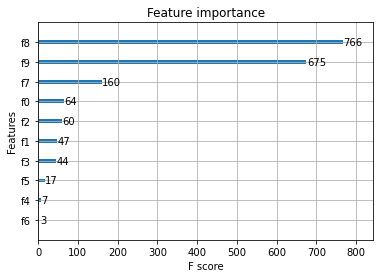

****************************************************************************************************


In [5]:
str="*"*100
#决策树
from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(str)



##随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
model.fit(X_train,y_train)
y_train_hat = model.predict(X_train)
y_hat = model.predict(X_test)
print('train accuracy_score:', metrics.accuracy_score(y_train,y_train_hat))
print('test accuracy_score:', metrics.accuracy_score(y_test,y_hat))
print('train auc_sorce:', metrics.roc_auc_score(y_train,y_train_hat))
print('test auc_sorce:', metrics.roc_auc_score(y_test,y_hat))
print(str)


##GBDT 
from sklearn.ensemble import GradientBoostingClassifier
dtc = GradientBoostingClassifier(loss='deviance', learning_rate=0.005, n_estimators=100,
                 subsample=1.0, min_samples_split=2,
                 min_samples_leaf=1, min_weight_fraction_leaf=0.,
                 max_depth=3, init=None, random_state=None,
                 max_features=None, verbose=0,
                 max_leaf_nodes=None, warm_start=False,
                 presort='auto')

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print (dtc.score(X_train,y_train))
print (dtc.score(X_test,y_test))
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))
print(str)



##Xgboost
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from matplotlib import pyplot
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
plot_importance(model)  # plot feature importance
pyplot.show()
print(str)

In [30]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)#随机选择25%作为测试集，剩余作为训练集
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
pca = PCA(n_components=4) # 保留7个主成分
lr = LogisticRegression() # 创建逻辑回归对象
X_train_pca = pca.fit_transform(X_train_std) # 把原始训练集映射到主成分组成的子空间中
X_test_pca = pca.transform(X_test_std) # 把原始测试集映射到主成分组成的子空间中
lr.fit(X_train_pca, y_train) # 用逻辑回归拟合数据
lr.score(X_test_pca, y_test) # 0.98 在测试集上的平均正确率为0.98

0.9145673603504929

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(X_train) # fit_transform for train data
x_test = ss.transform(X_test)
# use logestic-regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_y = lr.predict(x_test)
print(lr.score(x_test, y_test))

0.9156626506024096


In [34]:
# use svm
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
XX_train = ss.fit_transform(X_train) # fit_transform for train data
XX_test = ss.transform(X_test)
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(XX_train, y_train)
svm_y = lsvc.predict(XX_test)
print(lsvc.score(XX_test, y_test))

0.9156626506024096


D:\software\anaconda3\envs\tf2\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
